In [1]:
import pandas as pd
import numpy as np

# 1. Gathering Data

## 1a. Twitter Archive File

In [2]:
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
dog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## 1b. Image Predictions File

In [4]:
import requests

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [6]:
# Save TSV as file
with open('image_prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
# load the file using BeautifulSoup
from bs4 import BeautifulSoup

In [8]:
with open('image_prediction.tsv') as file:
    soup = BeautifulSoup(file, 'lxml')

In [9]:
soup

<html><body><p>tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.651137	Tr

In [10]:
# load the image-prediction with pandas
image_df = pd.read_csv('image_prediction.tsv', sep='\t')

In [11]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## 1c. Twitter API

In [12]:
import tweepy
import json
import re

In [13]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
# use the API to collect data
tweet_data = []
success_tweet = []
missing_tweet = []

for tweet_id in dog_archive['tweet_id']:
    try:
        data = api.get_status(tweet_id, tweet_mode = 'extended',
                             wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        
        tweet_data.append(data)
        success_tweet.append(tweet_id)
    except Exception as e:
        missing_tweet.append(tweet_id)
        print(f'{tweet_id}: {e}')

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

888202515573088257: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

873697596434513921: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872668790621863937: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


872261713294495745: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

869988702071779329: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

866816280283807744: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

861769973181624320: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

856602993587888130: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


856330835276025856: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

851953902622658560: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


851861385021730816: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

845459076796616705: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


844704788403113984: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


842892208864923648: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

837366284874571778: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


837012587749474308: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

829374341691346946: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

827228250799742977: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

812747805718642688: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

802247111496568832: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

779123168116150273: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

775096608509886464: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

771004394259247104: 403 Forbidden
179 - Sorry, you are not authorized to see this status.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


770743923962707968: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

766864461642756096: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

759923798737051648: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


759566828574212096: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

754011816964026368: 404 Not Found
144 - No status found with that ID.


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

689283819090870273: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


689280876073582592: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


689275259254616065: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


689255633275777024: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


689154315265683456: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


689143371370250240: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688916208532455424: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688908934925697024: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688898160958271489: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688894073864884227: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688828561667567616: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688804835492233216: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688789766343622656: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688547210804498433: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688519176466644993: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688385280030670848: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688211956440801280: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688179443353796608: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688116655151435777: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


688064179421470721: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687841446767013888: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687826841265172480: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687818504314159109: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687807801670897665: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687732144991551489: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687704180304273409: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687664829264453632: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687494652870668288: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687480748861947905: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687476254459715584: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687460506001633280: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687399393394311168: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687317306314240000: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687312378585812992: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687127927494963200: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687124485711986689: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687109925361856513: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687102708889812993: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


687096057537363968: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686947101016735744: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686760001961103360: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686749460672679938: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686730991906516992: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686683045143953408: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686618349602762752: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686606069955735556: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686394059078897668: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686386521809772549: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686377065986265092: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686358356425093120: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686286779679375361: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686050296934563840: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686035780142297088: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686034024800862208: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686007916130873345: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


686003207160610816: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685973236358713344: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685943807276412928: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685906723014619143: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685681090388975616: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685667379192414208: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685663452032069632: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685641971164143616: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685547936038666240: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685532292383666176: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685325112850124800: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685321586178670592: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685315239903100929: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685307451701334016: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685268753634967552: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685198997565345792: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


685169283572338688: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684969860808454144: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684959798585110529: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684940049151070208: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684926975086034944: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684914660081053696: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684902183876321280: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684880619965411328: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684830982659280897: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684800227459624960: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684594889858887680: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684588130326986752: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684567543613382656: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684538444857667585: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684481074559381504: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684460069371654144: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684241637099323392: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684225744407494656: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684222868335505415: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684200372118904832: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684195085588783105: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684188786104872960: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684177701129875456: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684147889187209216: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684122891630342144: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


684097758874210310: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683857920510050305: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683852578183077888: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683849932751646720: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683834909291606017: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683828599284170753: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683773439333797890: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683742671509258241: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683515932363329536: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683498322573824003: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683481228088049664: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683462770029932544: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683449695444799489: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683391852557561860: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683357973142474752: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683142553609318400: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683111407806746624: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683098815881154561: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683078886620553216: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


683030066213818368: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682962037429899265: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682808988178739200: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682788441537560576: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682750546109968385: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682697186228989953: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682662431982772225: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682638830361513985: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682429480204398592: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682406705142087680: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682393905736888321: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682389078323662849: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682303737705140231: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682259524040966145: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682242692827447297: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682088079302213632: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682059653698686977: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682047327939461121: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682032003584274432: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


682003177596559360: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681981167097122816: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681891461017812993: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681694085539872773: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681679526984871937: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681654059175129088: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681610798867845120: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681579835668455424: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681523177663676416: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681340665377193984: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681339448655802368: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681320187870711809: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681302363064414209: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681297372102656000: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681281657291280384: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681261549936340994: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681242418453299201: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681231109724700672: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


681193455364796417: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680970795137544192: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680959110691590145: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680940246314430465: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680934982542561280: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680913438424612864: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680889648562991104: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680836378243002368: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680805554198020098: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680801747103793152: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680798457301471234: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680609293079592961: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680583894916304897: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680497766108381184: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680494726643068929: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680473011644985345: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680440374763077632: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680221482581123072: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680206703334408192: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680191257256136705: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680176173301628928: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680161097740095489: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680145970311643136: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680130881361686529: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680115823365742593: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680100725817409536: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680085611152338944: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680070545539371008: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


680055455951884288: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679877062409191424: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679872969355714560: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679862121895714818: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679854723806179328: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679844490799091713: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679828447187857408: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679777920601223168: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679736210798047232: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679729593985699840: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679722016581222400: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679530280114372609: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679527802031484928: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679511351870550016: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679503373272485890: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679475951516934144: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679462823135686656: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679405845277462528: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679158373988876288: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679148763231985668: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679132435750195208: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679111216690831360: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679062614270468097: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679047485189439488: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


679001094530465792: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678991772295516161: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678969228704284672: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678800283649069056: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678798276842360832: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678774928607469569: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678767140346941444: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678764513869611008: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678755239630127104: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678740035362037760: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678708137298427904: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678675843183484930: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678643457146150913: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678446151570427904: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678424312106393600: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify


678410210315247616: 429 Too Many Requests
88 - Rate limit exceeded


Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter:

Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter: wait_on_rate_limit
Unexpected parameter: wait_on_rate_limit_notify
Unexpected parameter:

In [15]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [16]:
# Load the Twitter API data
tweet_api = pd.read_json('tweet_json.txt')
tweet_api['tweet_id'] = tweet_api['id']
tweet_api = tweet_api[['tweet_id', 'favorite_count', 'retweet_count', 'created_at', 'full_text']]

In [17]:
tweet_api.shape

(2108, 5)

# 2. Assessing Data

### 2a. Assessing `The WeRateDogs Twitter Archive`

In [20]:
dog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

`timestamp` appears to be in object instead of datetime

In [22]:
dog_archive.shape

(2356, 17)

In [23]:
# Check for missing value
dog_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
# Check for duplicates 
dog_archive.duplicated().sum()

0

In [25]:
# Check the value counts for rating numerator
dog_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [26]:
# Check the value counts for rating denominator
dog_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Checking the observations of the very high numerator rating; 3 figures and above (420, 144, 121, 143, 204, 1776, 165, 666, 182, 960)

In [27]:
# checking observation of the very high rating numerator
dog_archive[dog_archive['rating_numerator'] == 420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [28]:
# checking observation of the very high rating numerator 
dog_archive[dog_archive['rating_numerator'] == 144]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [29]:
dog_archive[dog_archive['rating_numerator'] == 121]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [30]:
dog_archive[dog_archive['rating_numerator'] == 143]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [31]:
dog_archive[dog_archive['rating_numerator'] == 204]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [32]:
dog_archive[dog_archive['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [33]:
dog_archive[dog_archive['rating_numerator'] == 165]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [34]:
dog_archive[dog_archive['rating_numerator'] == 666]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [35]:
dog_archive[dog_archive['rating_numerator'] == 182]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None


In [36]:
dog_archive[dog_archive['rating_numerator'] == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


It shows from the above assessments that numerators with very high rating (3 figures and above) neither have a dog name nor a dog type, the only exception was `1776` numerator rating, the name given was `Atticus`, without a dog type still. `204` had a wrong name of `this` and also without a dog type too. 

In [37]:
# let us have a look at the first tweet of every possible value of the rating numerator to find a reason to the above problem
num_rating = dog_archive['rating_numerator'].value_counts()
for c, i in enumerate(num_rating.index):
    print(f"{c}: {dog_archive.loc[dog_archive['rating_numerator'] == i, 'text'].values[0]}")

0: This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
1: Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4
2: @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs
3: This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
4: RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
5: RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…
6: I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
7: This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1

A simple explanaton from this first tweets shows, some of the tweets does not contain any dog name nor a dog type, and perhaps the more reason why those columns (dog name and dog type) were empty.

For the very high denominator rating (170, 150, 130, 120, 110), it already showed that some of the high numerator ratings have the high denominator rating. And as such, same assessment applies to them too.  

In [38]:
# let's assess the source of the tweets
dog_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
# check the names of dogs given
dog_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [40]:
# Check the number of observations with 'the' as a dog name
dog_archive[dog_archive['name'] == 'the'].shape

(8, 17)

In [41]:
# check the list of dog names to view the innappropriate names 
list(dog_archive.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

4 different dogs (doggo	floofer	pupper	puppo), lets check for each 

In [42]:
# Doggo
dog_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [43]:
# floofer
dog_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [44]:
# pupper
dog_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [45]:
# puppo
dog_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [46]:
# doggo and floofer dogs
dog_archive[(dog_archive['doggo'] == 'doggo') & (dog_archive.floofer == 'floofer')].shape

(1, 17)

In [47]:
# doggo and pupper dogs
dog_archive[(dog_archive['doggo'] == 'doggo') & (dog_archive.pupper == 'pupper')].shape

(12, 17)

In [48]:
dog_archive[dog_archive.rating_denominator == 150]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [49]:
dog_archive[dog_archive.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [50]:
# doggo and puppo dogs
dog_archive[(dog_archive['doggo'] == 'doggo') & (dog_archive.puppo == 'puppo')].shape

(1, 17)

In [51]:
# floofer and pupper dogs
dog_archive[(dog_archive['floofer'] == 'floofer') & (dog_archive.pupper == 'pupper')].shape

(0, 17)

In [52]:
# floofer and puppo dogs
dog_archive[(dog_archive['floofer'] == 'floofer') & (dog_archive.puppo == 'puppo')].shape

(0, 17)

In [53]:
# pupper and puppo dogs
dog_archive[(dog_archive['pupper'] == 'pupper') & (dog_archive.puppo == 'puppo')].shape

(0, 17)

## 2b. Assessing `The Tweet Image Predictions`

In [54]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [55]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [56]:
# Check fo rmissing value
image_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [57]:
# check for duplicates
sum(image_df.duplicated())

0

In [58]:
# value counts for P1
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [59]:
# value counts for P2
image_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [60]:
# value counts for P3
image_df.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [61]:
# value counts P1 dog
image_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [62]:
# value counts P2 dog
image_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [63]:
# value counts P3 dog
image_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [64]:
# check for the image number
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

## 3a. Assessing `The Tweet API Data`

In [65]:
tweet_api

,tweet_id,favorite_count,retweet_count,created_at,full_text
0,892420643555336193,33803,7000,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,29302,5298,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....
2,891815181378084864,22043,3477,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,36917,7222,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,35298,7754,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...
2103,666049248165822465,89,37,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...
2104,666044226329800704,247,115,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...
2105,666033412701032449,100,36,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...
2106,666029285002620928,112,39,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...


In [66]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2108 non-null   int64              
 1   favorite_count  2108 non-null   int64              
 2   retweet_count   2108 non-null   int64              
 3   created_at      2108 non-null   datetime64[ns, UTC]
 4   full_text       2108 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 82.5+ KB


 __________________________________________________________________________

<h1>Quality Issues</h1>

### Twitter Archive Data

<ol>
    <li>Retweets columns are present.</li>
    <li><code>tweet_id</code> is an integer.</li>
    <li>Dog stages columns <code>doggo</code>, <code>floofer</code>, <code>pupper</code>,and <code>puppo</code> contains <b>None</b>, instead of <b>NaN</b>s.</li>
    <li>Dog name also containes <b>None</b> instead of <b>NaN</b>s.</li>
    <li><code>timestamp</code> is object datatype.</li>
    <li>Extract the text from <code>source</code> column</li>
</ol>

### Image Predictions Data

<ol>
    <li><code>p1</code>, <code>p2</code> and <code>p3</code> contains some entries that are lower cased and some contains underscore.</li>
</ol>

### Twitter API Data

<ol>
    <li><code>tweet_id</code> is an integer instead of string.</li>
</ol>

<h1>Tidiness Issues</h1>

<ol>
    <li>4 different dog stages (doggo, floofer, pupper, puppo) that can just be in a column.</li>
    <li>The 3 dataframes sould be merged into one.</li>
</ol>

# 3. Cleaning the Data

### Define:

Merge the 3 dataset

### Code:

In [67]:
# merge the dataframes
full_tweet_df = pd.merge(dog_archive, image_df, how = 'inner', on = ['tweet_id'] )
full_tweet_df = pd.merge(full_tweet_df, tweet_api, how = 'inner', on = ['tweet_id'])
full_tweet_df.to_csv('full_tweet.csv', encoding = 'utf-8')

### Test

In [68]:
# Test the change above

full_tweet_df.shape, dog_archive.shape, image_df.shape[0] - full_tweet_df.shape[0]

((1860, 32), (2356, 17), 215)

In [69]:
# Copy the dataframes
dog_archive_clean = dog_archive.copy()
image_df_clean = image_df.copy()
twitter_api_clean = tweet_api.copy()
full_tweet_clean = full_tweet_df.copy()

In [70]:
full_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1860 entries, 0 to 1859
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1860 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   1860 non-null   object             
 4   source                      1860 non-null   object             
 5   text                        1860 non-null   object             
 6   retweeted_status_id         71 non-null     float64            
 7   retweeted_status_user_id    71 non-null     float64            
 8   retweeted_status_timestamp  71 non-null     object             
 9   expanded_urls               1860 non-null   object             
 10  rating_numerator            1860 non-null   int64           

### Define:

Delete retweets from the dataset

### Code

In [71]:
# Delete retweets

full_tweet_clean = full_tweet_clean[pd.isnull(full_tweet_clean.retweeted_status_id)]

### Test

In [72]:
full_tweet_clean.shape

(1789, 32)

In [73]:
full_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 1859
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1789 non-null   int64              
 1   in_reply_to_status_id       21 non-null     float64            
 2   in_reply_to_user_id         21 non-null     float64            
 3   timestamp                   1789 non-null   object             
 4   source                      1789 non-null   object             
 5   text                        1789 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1789 non-null   object             
 10  rating_numerator            1789 non-null   int64           

### Define:

Delete the following colunms; `in_reply_to_user_id`, `in_reply_to_status_id`, `timestamp`, `text`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

In [74]:
# create a list of the columns to be deleted

drop_columns = ['in_reply_to_user_id', 'in_reply_to_status_id', 
           'timestamp', 'text', 
           'retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp']

full_tweet_clean = full_tweet_clean.drop(drop_columns, 1)

<ipython-input-74-04d5a0a23479>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_tweet_clean = full_tweet_clean.drop(drop_columns, 1)


### Test

In [75]:
full_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 1859
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1789 non-null   int64              
 1   source              1789 non-null   object             
 2   expanded_urls       1789 non-null   object             
 3   rating_numerator    1789 non-null   int64              
 4   rating_denominator  1789 non-null   int64              
 5   name                1789 non-null   object             
 6   doggo               1789 non-null   object             
 7   floofer             1789 non-null   object             
 8   pupper              1789 non-null   object             
 9   puppo               1789 non-null   object             
 10  jpg_url             1789 non-null   object             
 11  img_num             1789 non-null   int64              
 12  p1                  1789 non-null 

### Define:

Create new columns (date and time) from `created_at`

### Code

In [76]:
# Create new columns `date` and `time` based on `created_at`

full_tweet_clean['date'] = full_tweet_clean['created_at'].dt.date
full_tweet_clean['time'] = full_tweet_clean['created_at'].dt.time

### Test

In [78]:
full_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1789 entries, 0 to 1859
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1789 non-null   int64              
 1   source              1789 non-null   object             
 2   expanded_urls       1789 non-null   object             
 3   rating_numerator    1789 non-null   int64              
 4   rating_denominator  1789 non-null   int64              
 5   name                1789 non-null   object             
 6   doggo               1789 non-null   object             
 7   floofer             1789 non-null   object             
 8   pupper              1789 non-null   object             
 9   puppo               1789 non-null   object             
 10  jpg_url             1789 non-null   object             
 11  img_num             1789 non-null   int64              
 12  p1                  1789 non-null 

In [79]:
full_tweet_clean[['created_at', 'date', 'time']]

,created_at,date,time
0,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56
1,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27
2,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03
3,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51
4,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24
...,...,...,...
1855,2015-11-16 00:24:50+00:00,2015-11-16,00:24:50
1856,2015-11-16 00:04:52+00:00,2015-11-16,00:04:52
1857,2015-11-15 23:21:54+00:00,2015-11-15,23:21:54
1858,2015-11-15 23:05:30+00:00,2015-11-15,23:05:30


### Define:

Create a new column to be dog_stages for the following columns; `doggo`, `floofer`, `pupper`, `puppo`

### Code

In [80]:
# select the columns to melt and to remain
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
col_left = [x for x in full_tweet_clean.columns.tolist() if x not in columns_to_melt]

# melt to a colunms
full_tweet_clean = pd.melt(full_tweet_clean, id_vars=col_left,
                          var_name='stages', value_name='dog_stages')

In [81]:
# drop stages column
full_tweet_clean.drop('stages', 1, inplace=True)

<ipython-input-81-f30f854ced1f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  full_tweet_clean.drop('stages', 1, inplace=True)


### Test

In [82]:
full_tweet_clean

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,full_text,date,time,dog_stages
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,...,banana,0.076110,False,33803,7000,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,papillon,0.068957,True,29302,5298,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,kelpie,0.031379,True,22043,3477,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,...,spatula,0.040836,False,36917,7222,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,German_short-haired_pointer,0.175219,True,35298,7754,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,2017-07-29,16:00:24,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666049248...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,...,Doberman,0.154629,True,89,37,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,2015-11-16,00:24:50,None
7152,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...,6,10,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,...,miniature_pinscher,0.222752,True,247,115,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,2015-11-16,00:04:52,None
7153,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666033412...,9,10,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,...,bloodhound,0.116197,True,100,36,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,2015-11-15,23:21:54,None
7154,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...,7,10,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,...,Rhodesian_ridgeback,0.072010,True,112,39,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,2015-11-15,23:05:30,None


In [83]:
full_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            7156 non-null   int64              
 1   source              7156 non-null   object             
 2   expanded_urls       7156 non-null   object             
 3   rating_numerator    7156 non-null   int64              
 4   rating_denominator  7156 non-null   int64              
 5   name                7156 non-null   object             
 6   jpg_url             7156 non-null   object             
 7   img_num             7156 non-null   int64              
 8   p1                  7156 non-null   object             
 9   p1_conf             7156 non-null   float64            
 10  p1_dog              7156 non-null   bool               
 11  p2                  7156 non-null   object             
 12  p2_conf             7156 non-null 

### Define

Replace the **None**s to **Nan**s in the new `dog_stages` column that has just been created above

### Code

In [84]:
# Replace none with nans
full_tweet_clean.dog_stages = full_tweet_clean['dog_stages'].replace('None', np.nan)

# change the dog stages to categorical types
full_tweet_clean['dog_stages'] = full_tweet_clean.dog_stages.astype('category')

### Test

In [85]:
full_tweet_clean.dog_stages.value_counts()

pupper     166
doggo       73
puppo       23
floofer      7
Name: dog_stages, dtype: int64

### Define:

Replace the underscore in `p1`, `p2`, `p3` with a space and capitalize them

### Code

In [86]:
# replace underscore with space
full_tweet_clean['p1'] = full_tweet_clean.p1.str.replace('_', ' ')
full_tweet_clean['p2'] = full_tweet_clean.p2.str.replace('_', ' ')
full_tweet_clean['p3'] = full_tweet_clean.p3.str.replace('_', ' ')

# capitalize p1, p2, p3
full_tweet_clean['p1'] = full_tweet_clean.p1.str.title()
full_tweet_clean['p2'] = full_tweet_clean.p2.str.title()
full_tweet_clean['p3'] = full_tweet_clean.p3.str.title()

### Test

In [87]:
full_tweet_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
...,...,...,...
7151,Miniature Pinscher,Rottweiler,Doberman
7152,Rhodesian Ridgeback,Redbone,Miniature Pinscher
7153,German Shepherd,Malinois,Bloodhound
7154,Redbone,Miniature Pinscher,Rhodesian Ridgeback


### Define: 

Change the type of the `tweet_id` to string

### Code

In [88]:
# Make the tweet_id string (object)
full_tweet_clean.tweet_id = full_tweet_clean['tweet_id'].astype(str)

### Test

In [89]:
full_tweet_clean.tweet_id.dtype

dtype('O')

### Define:

Show the type of device used to tweet

### Code

In [90]:
# show the type device

full_tweet_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     7016
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      112
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      28
Name: source, dtype: int64

In [91]:
# use regular expreesion to extract the actual device type
full_tweet_clean.source = full_tweet_clean.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand=True)[4]

### Test

In [92]:
full_tweet_clean.source.value_counts()

Twitter for iPhone    7016
Twitter Web Client     112
TweetDeck               28
Name: source, dtype: int64

### Define:

Change the source type to category

### Code

In [93]:
full_tweet_clean.source = full_tweet_clean['source'].astype('category')

### Test

In [94]:
full_tweet_clean['source'].dtype

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone'], ordered=False)

### Define:

Replace names of dog that are not proper from the `name` column to np.nan

### Code

In [105]:
# names that begins with lowercase letter
cased_lower = []
for row in full_tweet_clean['name']:
    if row[0].islower() and row not in cased_lower:
        cased_lower.append(row)
print(cased_lower)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'light', 'space']


In [107]:
# replace names starting with a lowercase letter with NaNs
full_tweet_clean['name'] = full_tweet_clean['name'].replace(cased_lower, np.nan)

### Test

In [116]:
cased_lower[18] in full_tweet_clean.name

False

### Define:

Replace the **None** in `name` with **Nan**

### Code

In [117]:
full_tweet_clean['name'].replace('None', np.nan, inplace = True)

### Test

In [119]:
print(list(full_tweet_clean.name))

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax', nan, 'Zoey', 'Cassie', 'Koda', 'Bruno', nan, 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela', nan, nan, 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', nan, 'Earl', 'Lola', 'Kevin', nan, 'Yogi', 'Noah', 'Bella', 'Grizzwald', nan, 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', nan, 'Elliot', 'Louis', nan, 'Bella', 'Jesse', nan, 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', nan, 'Cash', 'Jed', nan, 'Sebastian', nan, 'Sierra', nan, nan, 'Monkey', nan, 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', nan, 'Cody', 'Zoey', 'Rumble', 'Clifford', 'Dewey', 'Stanley', 'Scout', 'Gizmo', 'Walter', nan, 'Cooper', nan, 'Harold', 'Shikha', nan, 'Lili', 'Jamesy', 'Coco', 'Boomer', 'Sammy', 'Nelly', nan, 'Meatball', 'Paisley', 'Albus', 'Neptune', 'Bel

# 4. Store Data

In [121]:
full_tweet_clean.to_csv('twitter_archive_master.csv', index = False, encoding='utf-8')

# 5. Data Analysis and Visualization

In [123]:
df_tweet = pd.read_csv('twitter_archive_master.csv')

In [129]:
df_tweet.head(3)

,tweet_id,source,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,full_text,date,time,dog_stages
0,892420643555336193,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,...,Banana,0.076110,False,33803,7000,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,2017-08-01,16:23:56,NaN
1,892177421306343426,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,Papillon,0.068957,True,29302,5298,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,2017-08-01,00:17:27,NaN
2,891815181378084864,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,Kelpie,0.031379,True,22043,3477,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31,00:18:03,NaN


Text(0, 0.5, 'Number of tweets')

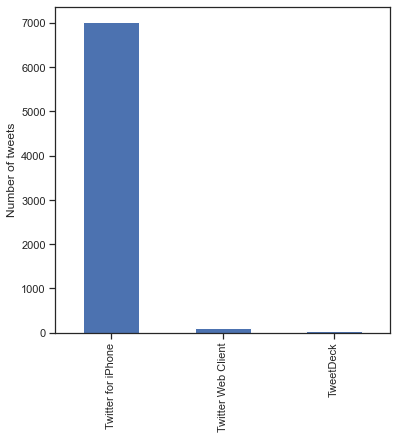

In [159]:
# Most used kind of device
plot = df_tweet['source'].value_counts().plot(kind = 'bar', figsize = (6,6))
plot.set_ylabel('Number of tweets')

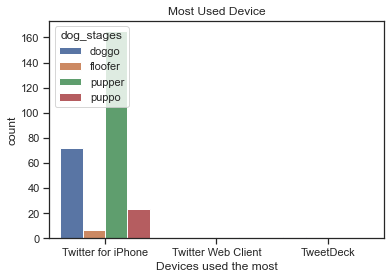

<Figure size 1080x1224 with 0 Axes>

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# dog stages with the most used device

p = sns.countplot(x = "source", data = df_tweet, hue = "dog_stages")
sns.set_theme(style = "ticks", color_codes = True)
p.set_title("Most Used Device")
p.set_xlabel('Devices used the most')
plt.figure(figsize = (15, 17))
plt.show()

In [135]:
# let get the stages of dog that is mostly retweeted
df_tweet.groupby(['dog_stages'])['favorite_count'].mean()

dog_stages
doggo      17203.739726
floofer    13062.428571
pupper      7109.909639
puppo      20536.478261
Name: favorite_count, dtype: float64

Text(0.5, 3.200000000000003, 'Dog stages')

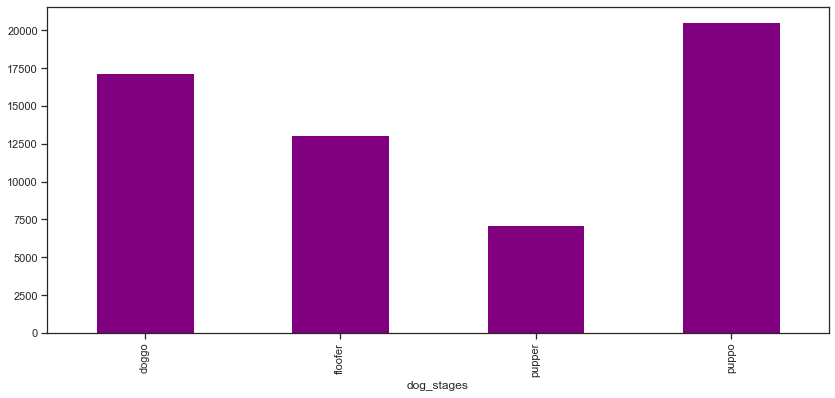

In [150]:
# let get the stages of dog that is mostly liked
df_tweet.groupby(['dog_stages'])['favorite_count'].mean().plot(kind = 'bar', stacked = False, figsize = (14,6), color='purple')
plot.set_ylabel('Favorite Count')
plot.set_xlabel("Dog stages")

In [144]:
# dog stages with the highest retweet count
# let get the stages of dog that is mostly retweeted
df_tweet.groupby(['dog_stages'])['retweet_count'].mean()

dog_stages
doggo      5754.410959
floofer    4321.714286
pupper     2118.843373
puppo      5791.217391
Name: retweet_count, dtype: float64

Text(0.5, 3.200000000000003, 'Dog stages')

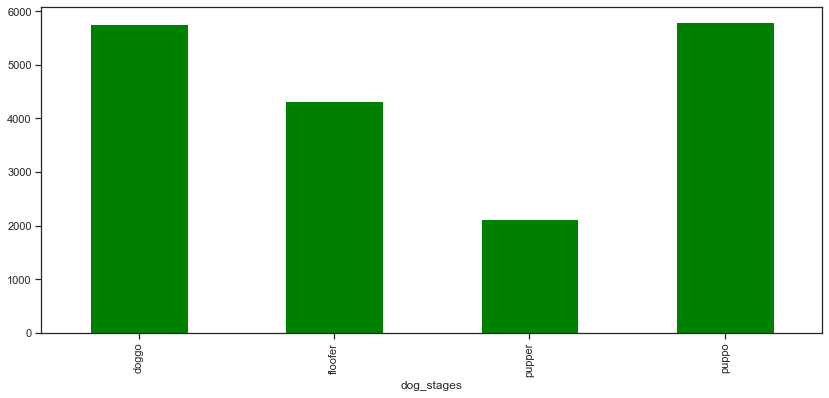

In [152]:
# let get the stages of dog that is mostly retweeted
df_tweet.groupby(['dog_stages'])['retweet_count'].mean().plot(kind = 'bar', stacked = False, color='green', figsize = (14,6))
plot.set_ylabel('Favorite Count')
plot.set_xlabel("Dog stages")

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Most common dog names')

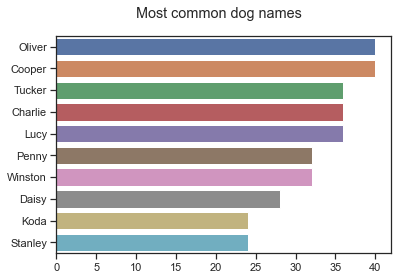

In [153]:
# most common dog names
names = df_tweet['name'].value_counts()[:10]
sns.barplot(names.values, names.index)
plt.suptitle('Most common dog names')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Most common dog type')

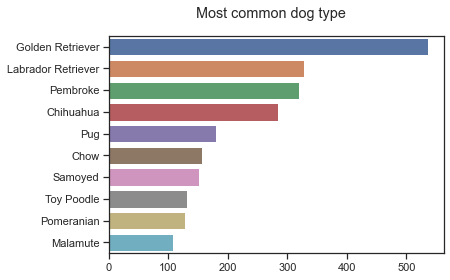

In [154]:
# most common dog types
dog_type = df_tweet['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common dog type')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


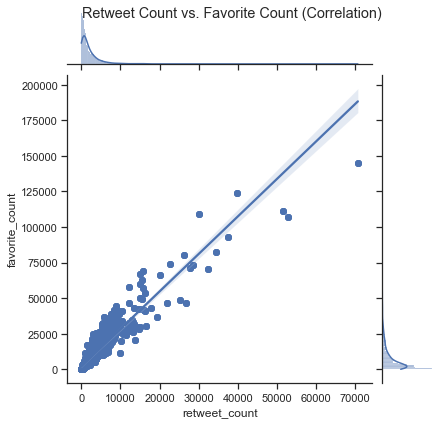

In [162]:
# let's also check if there's a positive relationship between favorite count and retweet count

p = sns.jointplot(x=df_tweet.retweet_count,y=df_tweet.favorite_count, size=6, kind='reg');
p.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');

As shown in the plot above, there is a positive correlation between the `favorite_count` and the `retweet_count`. In other words, more tweets are designated as favorites when more tweets are retweeted, which makes sense given that most individuals who appreciate a tweet are inclined to retweet it.

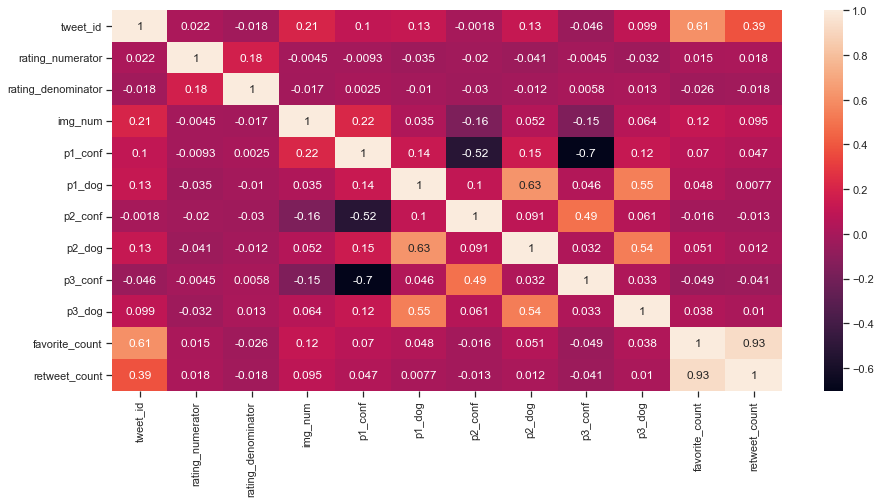

In [165]:
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df_tweet.corr(),annot=True, ax=ax);

The heatmap above, the following was noted:

- There is a strong positive correlation (0.93) between `favorit_count` and `retweet_count` which support our observation above.
- There is a relatively strong negative correlation between `p3_conf`, `p2_conf` and `p1_conf` which is interesting as different predictions may have opposing confidence levels.